In [39]:
import json
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
from torchvision.io import read_image
import os
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import torch

In [7]:
imgs_path = "C:/Users/louis/thesis/de Bruyn-Stage-2022/Data/yolo_dataset/images/"
labels_path = "C:/Users/louis/thesis/de Bruyn-Stage-2022/Data/coco/"

labels_train = labels_path+"train.json"
imgs_train_path = imgs_path+"train"

# Opening JSON file
f = open(labels_train)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
for i in data['categories']:
    print(i)
f.close()   

{'supercategory': 'none', 'id': 0, 'name': 'Broken glass'}
{'supercategory': 'none', 'id': 1, 'name': 'Major front damage'}
{'supercategory': 'none', 'id': 2, 'name': 'Major rear damage'}
{'supercategory': 'none', 'id': 3, 'name': 'Major side damage'}
{'supercategory': 'none', 'id': 4, 'name': 'Minor front damage'}
{'supercategory': 'none', 'id': 5, 'name': 'Minor rear damage'}
{'supercategory': 'none', 'id': 6, 'name': 'Minor side damage'}
{'supercategory': 'none', 'id': 7, 'name': 'Scratches'}


In [11]:
print(data.keys())

dict_keys(['categories', 'images', 'annotations', 'type'])


In [19]:
data["images"][2]

{'file_name': 'id_1625651032437.jpg', 'height': 416, 'width': 416, 'id': 3}

In [18]:
data["annotations"][2]

{'iscrowd': 0,
 'image_id': 3,
 'bbox': [124, 15, 144, 338],
 'area': 48672.0,
 'category_id': 5,
 'ignore': 0,
 'id': 1,
 'segmentation': [[124, 15, 124, 353, 268, 353, 268, 15]]}

In [32]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [40]:
classes = {0: 'Broken glass', 1: 'Major front damage', 2: 'Major rear damage',
 3: 'Major side damage', 4: 'Minor front damage', 5: 'Minor rear damage',
 6 : 'Minor side damage', 7: 'Scratches'}
 
def build_dataset(data,data_path,dataset_name,dataset_transforms):
    
    labels_df = pd.DataFrame(columns = ["Filename","Label"])

    for i in data['images']:
        labels_df.loc[i["id"]] = [i['file_name'],-1]
    for i in data['annotations']:
        labels_df.at[i["image_id"],'Label'] = i['category_id']
        
    labels_df.to_csv(dataset_name, index = False)
    
    dataset = CustomImageDataset(annotation_file=dataset_name,img_dir=data_path,transform= dataset_transforms)   
    
    return dataset

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    torchvision.transforms.Resize((288,288)),
    #T.RandomResizedCrop(image_size), # data augmentation
    # T.RandomHorizontalFlip(),
    transforms.ToTensor()])

train_coco = build_dataset(data,imgs_train_path,"train_coco",train_transforms)
batch_size = 4
trainloader = torch.utils.data.DataLoader(train_coco, batch_size=batch_size, shuffle=True)

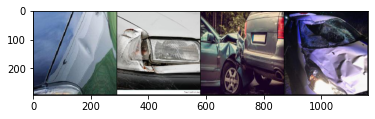

Minor side damage - Minor front damage - Major front damage - Broken glass -


In [43]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)

# for images, labels in dataiter:
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels

print(' '.join(f'{classes[labels[j].item()]} -' for j in range(batch_size)))